In [1]:
'''
standby: 0.1067W (dlog_standby *90min*), 0.1057W (dlog_standby1), 0.1048W (dlog_standby2),  
1min sync: 0.1424W (dlog_1min_sync), 0.1525W (dlog_1min_sync1), 0.1507W (dlog_1min_sync2)
10min sync: 0.1118W (dlog_10min_sync), 0.1124W (dlog_10min_sync1), 0.1122W (dlog_10min_sync2)
30min sync: 0.1065W (dlog_30min_sync), 0.1069W (dlog_30min_sync1)
'''

'\nstandby: 0.1067W (dlog_standby *90min*), 0.1057W (dlog_standby1), 0.1048W (dlog_standby2),  \n1min sync: 0.1424W (dlog_1min_sync), 0.1525W (dlog_1min_sync1), 0.1507W (dlog_1min_sync2)\n10min sync: 0.1118W (dlog_10min_sync), 0.1124W (dlog_10min_sync1), 0.1122W (dlog_10min_sync2)\n30min sync: 0.1065W (dlog_30min_sync), 0.1069W (dlog_30min_sync1)\n'

In [2]:
import time
import datetime as pydt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pylab as P

%matplotlib inline

In [3]:
no_sync_series = pd.Series([0.1067, 0.1057, 0.1048])
one_min_sync_series = pd.Series([0.1424, 0.1525, 0.1507])
ten_min_sync_series = pd.Series([0.1118, 0.1124, 0.1122])
thirty_min_sync_series = pd.Series([0.1065, 0.1069])

In [4]:
sync_overhead_df = pd.DataFrame()
sync_overhead_df['1 min'] = [one_min_sync_series.mean(), one_min_sync_series.std()]
sync_overhead_df['10 min'] = [ten_min_sync_series.mean(), ten_min_sync_series.std()]
sync_overhead_df['30 min'] = [thirty_min_sync_series.mean(), thirty_min_sync_series.std()]
sync_overhead_df['no sync'] = [no_sync_series.mean(), no_sync_series.std()]

In [5]:
sync_overhead_df = sync_overhead_df.transpose()
sync_overhead_df

,0,1
1 min,0.148533,0.005387
10 min,0.112133,0.000306
30 min,0.106700,0.000283
no sync,0.105733,0.000950


In [6]:
sync_overhead_df.columns = ["means", "stds"]
sync_overhead_df

,means,stds
1 min,0.148533,0.005387
10 min,0.112133,0.000306
30 min,0.106700,0.000283
no sync,0.105733,0.000950


In [12]:
sync_overhead_df.to_latex()

u'\\begin{tabular}{lrrl}\n\\toprule\n{} &     means &      stds &    label \\\\\n\\midrule\n1 min   &  0.148533 &  0.005387 &    1 min \\\\\n10 min  &  0.112133 &  0.000306 &   10 min \\\\\n30 min  &  0.106700 &  0.000283 &   30 min \\\\\nno sync &  0.105733 &  0.000950 &  no sync \\\\\n\\bottomrule\n\\end{tabular}\n'

In [7]:
sync_overhead_df['label'] = sync_overhead_df.index

In [10]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

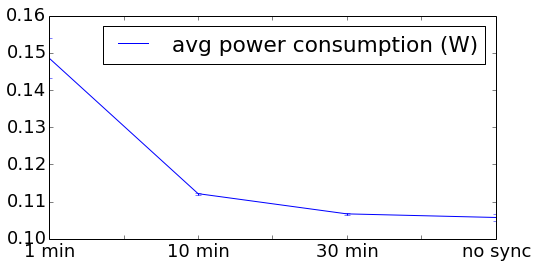

In [13]:
sync_overhead_df.plot(y='means', yerr='stds', figsize=(8,4), label="avg power consumption (W)")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")
plt.plot(x,y)

In [ ]:
# reading hw data for 1min sync
hw_df = pd.read_csv("dlog/dlog_1min_sync.csv", error_bad_lines=False) 

# voltage is measured in volts
# current is measured in amperes
hw_df['seconds'] = hw_df.time
hw_df['power'] = hw_df.voltage * hw_df.current
hw_df['hr'] = hw_df.seconds/3600.0
hw_df['m'] = hw_df.seconds/60.0


#===============================
hw_df1 = hw_df 

power_mean = np.mean(hw_df1.power)
#ax = hw_df.plot(x='m', y='power', label='baseline (avg power=%s)'% round(power_mean,4))
#ax.set_ylabel("power (W)")

ax = hw_df1.boxplot(column='power')
hw_df1.power.describe()

In [ ]:
# example data
x = hw_df1.seconds
y = hw_df1.power

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")
plt.plot(x,y)